In [1]:
import csv

STOCKS_FILE_NAME = 'N7.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['AAPL', 'GOOG', 'BAC', 'WTW', 'PCRX', 'LOW', 'CRM']

In [2]:
import requests
import csv

def get_minute_data(symbol):        
    url = "https://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q={}".format(symbol)
    page = requests.get(url)
    reader = csv.reader(page.content.decode('utf-8').splitlines())
    return symbol, list(reader) 
_, data = get_minute_data("AAPL")
data

[['EXCHANGE%3DNASDAQ'],
 ['MARKET_OPEN_MINUTE=570'],
 ['MARKET_CLOSE_MINUTE=960'],
 ['INTERVAL=60'],
 ['COLUMNS=DATE', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME'],
 ['DATA='],
 ['TIMEZONE_OFFSET=-300'],
 ['a1488983400', '138.95', '138.96', '138.9', '138.95', '238854'],
 ['1', '138.94', '139.25', '138.9', '138.95', '244219'],
 ['2', '139.01', '139.28', '138.91', '138.94', '132159'],
 ['3', '139.1', '139.14', '138.96', '139', '120175'],
 ['4', '139.29', '139.34', '139.04', '139.08', '113937'],
 ['5', '139.34', '139.4', '139.2444', '139.29', '120678'],
 ['6', '139.22', '139.49', '139.21', '139.34', '180714'],
 ['7', '139.16', '139.285', '139.1', '139.21', '92119'],
 ['8', '139.34', '139.35', '139.13', '139.16', '90167'],
 ['9', '139.35', '139.35', '139.25', '139.34', '72564'],
 ['10', '139.21', '139.44', '139.2', '139.36', '95795'],
 ['11', '139.18', '139.24', '139.14', '139.21', '99467'],
 ['12', '139.23', '139.32', '139.157', '139.19', '65287'],
 ['13', '139.2537', '139.27', '139.21', '13

In [3]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np

DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')

def minute_data_to_df(data):
    base_timestamp = 0
    t, c, h, l, o, v = [[] for i in range(6)]
    for i, row in enumerate(data):
        if len(row) == 6:
            timestamp, close, high, low, open, volume = row
            if timestamp.startswith("a"):
                base_timestamp = int(timestamp[1:])                
            elif timestamp.isnumeric(): 
                delta = timedelta(seconds=60 * (int(timestamp) - 1))
                dt = datetime.fromtimestamp(base_timestamp, tz=DATA_TIMEZONE) + delta
                t.append(dt.astimezone(LOCAL_TZ))
                c.append(float(close))
                h.append(float(high))
                l.append(float(low))
                o.append(float(open))
                v.append(int(volume))
                
    df = df = pd.DataFrame(dict(time=t, close=c, high=h, low=l, open=o, volume=v))
    return df                
    
md_df = minute_data_to_df(data)
md_df

,close,high,low,open,time,volume
0,138.9400,139.2500,138.9000,138.9500,2017-03-08 06:30:00-08:00,244219
1,139.0100,139.2800,138.9100,138.9400,2017-03-08 06:31:00-08:00,132159
2,139.1000,139.1400,138.9600,139.0000,2017-03-08 06:32:00-08:00,120175
3,139.2900,139.3400,139.0400,139.0800,2017-03-08 06:33:00-08:00,113937
4,139.3400,139.4000,139.2444,139.2900,2017-03-08 06:34:00-08:00,120678
5,139.2200,139.4900,139.2100,139.3400,2017-03-08 06:35:00-08:00,180714
6,139.1600,139.2850,139.1000,139.2100,2017-03-08 06:36:00-08:00,92119
7,139.3400,139.3500,139.1300,139.1600,2017-03-08 06:37:00-08:00,90167
8,139.3500,139.3500,139.2500,139.3400,2017-03-08 06:38:00-08:00,72564
9,139.2100,139.4400,139.2000,139.3600,2017-03-08 06:39:00-08:00,95795


In [4]:
last_date = md_df.time.max().date()
print(last_date)
prev_days_data = md_df[md_df.time.dt.date != last_date]
prev_data_len = len(prev_days_data)
prev_close = prev_days_data.iloc[prev_data_len - 1].close
print(prev_close)

2017-03-21
141.46


In [5]:
avg9days = md_df[md_df.time.dt.date != last_date].volume.mean()
print(avg9days)
md_df = md_df[md_df.time.dt.date == last_date].copy()
md_df['prev_close'] = prev_close
md_df['current_score'] = md_df.volume / avg9days
dd_len = len(md_df)
md_df['rolling_score'] = md_df.current_score.rolling(window=dd_len, min_periods=1).mean()
md_df

44855.8367056


,close,high,low,open,time,volume,prev_close,current_score,rolling_score
3509,142.3800,142.5000,142.1500,142.1700,2017-03-21 06:30:00-07:00,463172,141.46,10.325791,10.325791
3510,142.3100,142.4600,142.2700,142.4000,2017-03-21 06:31:00-07:00,364313,141.46,8.121864,9.223827
3511,142.3600,142.3900,142.1600,142.2908,2017-03-21 06:32:00-07:00,198924,141.46,4.434741,7.627465
3512,142.3200,142.3600,142.2300,142.3600,2017-03-21 06:33:00-07:00,141505,141.46,3.154662,6.509264
3513,142.4800,142.5100,142.3000,142.3000,2017-03-21 06:34:00-07:00,308437,141.46,6.876184,6.582648
3514,142.5900,142.6300,142.4500,142.4800,2017-03-21 06:35:00-07:00,238793,141.46,5.323566,6.372801
3515,142.7400,142.7400,142.5700,142.5800,2017-03-21 06:36:00-07:00,220469,141.46,4.915057,6.164552
3516,142.6600,142.7400,142.6000,142.7350,2017-03-21 06:37:00-07:00,259470,141.46,5.784531,6.117050
3517,142.5799,142.7400,142.5499,142.6500,2017-03-21 06:38:00-07:00,258968,141.46,5.773340,6.078860
3518,142.4900,142.6200,142.4300,142.5750,2017-03-21 06:39:00-07:00,260264,141.46,5.802233,6.051197


In [6]:
todays_open = md_df.iloc[0].open
dd_len = len(md_df)
md_df['opening_change'] = (todays_open / md_df['prev_close'] - 1) * 100
md_df['rolling_high'] = md_df.high.rolling(window=dd_len, min_periods=1).max()
md_df['rolling_low'] = md_df.low.rolling(window=dd_len, min_periods=1).min()
md_df['change_current'] = (md_df.close / todays_open - 1) * 100
md_df['change_high'] = (md_df.rolling_high / todays_open - 1) * 100
md_df['change_low'] = (md_df.rolling_low / todays_open - 1) * 100
md_df[["close", "high", "low", "open", "change_current", "change_high", "change_low", "opening_change"]]

,close,high,low,open,change_current,change_high,change_low,opening_change
3509,142.3800,142.5000,142.1500,142.1700,0.147710,0.232116,-0.014068,0.501909
3510,142.3100,142.4600,142.2700,142.4000,0.098474,0.232116,-0.014068,0.501909
3511,142.3600,142.3900,142.1600,142.2908,0.133643,0.232116,-0.014068,0.501909
3512,142.3200,142.3600,142.2300,142.3600,0.105507,0.232116,-0.014068,0.501909
3513,142.4800,142.5100,142.3000,142.3000,0.218049,0.239150,-0.014068,0.501909
3514,142.5900,142.6300,142.4500,142.4800,0.295421,0.323556,-0.014068,0.501909
3515,142.7400,142.7400,142.5700,142.5800,0.400928,0.400928,-0.014068,0.501909
3516,142.6600,142.7400,142.6000,142.7350,0.344658,0.400928,-0.014068,0.501909
3517,142.5799,142.7400,142.5499,142.6500,0.288317,0.400928,-0.014068,0.501909
3518,142.4900,142.6200,142.4300,142.5750,0.225083,0.400928,-0.014068,0.501909


In [16]:
import threading
import queue


def get_data_parallel(symbols):    
    max_threads = 300
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_minute_data(*args)
            if response:
                result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock,))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    while True:
        try:
            symbol, raw_data = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            data = minute_data_to_df(raw_data)
            if len(data):
                last_date = data.time.max().date()

                prev_days_data = data[data.time.dt.date != last_date]
                prev_data_len = len(prev_days_data)
                prev_close = prev_days_data.iloc[prev_data_len - 1].close
                avg9days = prev_days_data.volume.mean()

                data = data[data.time.dt.date == last_date].copy()
                data['symbol'] = symbol
                data['prev_close'] = prev_close
                data['avg9days'] = avg9days
                data['current_score'] = data.volume / avg9days
                dd_len = len(data)
                data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()

                todays_open = data.iloc[0].open
                data['opening_change'] = (todays_open / data['prev_close'] - 1) * 100
                data['rolling_high'] = data.high.rolling(window=dd_len, min_periods=1).max()
                data['rolling_low'] = data.low.rolling(window=dd_len, min_periods=1).min()
                data['change_current'] = (data.close / todays_open - 1) * 100
                data['change_high'] = (data.rolling_high / todays_open - 1) * 100
                data['change_low'] = (data.rolling_low / todays_open - 1) * 100

                if df is None:
                    df = data
                else:
                    df = df.append(data, ignore_index=True)            
            
    return df[df.volume.notnull()]

all_dd = get_data_parallel(stocks[:10])
all_dd

,close,high,low,open,time,volume,symbol,prev_close,avg9days,current_score,rolling_score,opening_change,rolling_high,rolling_low,change_current,change_high,change_low
0,14.8100,14.8500,14.8100,14.8400,2017-03-21 06:30:00-07:00,1643,WTW,14.93,2994.000947,0.548764,0.548764,-0.602813,14.85,14.8100,-0.202156,0.067385,-0.202156
1,14.8200,14.8400,14.8000,14.8000,2017-03-21 06:31:00-07:00,1100,WTW,14.93,2994.000947,0.367401,0.458083,-0.602813,14.85,14.8000,-0.134771,0.067385,-0.269542
2,14.8500,14.8500,14.8000,14.8200,2017-03-21 06:32:00-07:00,6334,WTW,14.93,2994.000947,2.115564,1.010576,-0.602813,14.85,14.8000,0.067385,0.067385,-0.269542
3,14.8800,14.8800,14.8700,14.8700,2017-03-21 06:33:00-07:00,400,WTW,14.93,2994.000947,0.133600,0.791332,-0.602813,14.88,14.8000,0.269542,0.269542,-0.269542
4,14.8800,14.8800,14.8800,14.8800,2017-03-21 06:34:00-07:00,300,WTW,14.93,2994.000947,0.100200,0.653106,-0.602813,14.88,14.8000,0.269542,0.269542,-0.269542
5,14.8200,14.8700,14.8200,14.8700,2017-03-21 06:35:00-07:00,5250,WTW,14.93,2994.000947,1.753506,0.836506,-0.602813,14.88,14.8000,-0.134771,0.269542,-0.269542
6,14.8200,14.8200,14.8200,14.8200,2017-03-21 06:37:00-07:00,500,WTW,14.93,2994.000947,0.167001,0.740862,-0.602813,14.88,14.8000,-0.134771,0.269542,-0.269542
7,14.8200,14.8400,14.8200,14.8200,2017-03-21 06:38:00-07:00,10419,WTW,14.93,2994.000947,3.479959,1.083249,-0.602813,14.88,14.8000,-0.134771,0.269542,-0.269542
8,14.8502,14.8502,14.8502,14.8502,2017-03-21 06:39:00-07:00,1000,WTW,14.93,2994.000947,0.334001,1.000000,-0.602813,14.88,14.8000,0.068733,0.269542,-0.269542
9,14.8200,14.8600,14.8200,14.8600,2017-03-21 06:40:00-07:00,1700,WTW,14.93,2994.000947,0.567802,0.956780,-0.602813,14.88,14.8000,-0.134771,0.269542,-0.269542


In [8]:
# getting trade data

from urllib.parse import quote_plus, urlparse, parse_qs
from lxml import html
import re


NUM_THREADS = 300

def pull_trades(proxy, q, r, stock, time, pageno=None):
    
    base_url = "http://www.nasdaq.com/symbol/{symbol}/time-sales?time={time}&pageno={pageno}"
    url = base_url.format(symbol=stock.lower(), time=time, pageno=pageno or 1)
    try:
        page_res = requests.get(url, timeout=6, proxies={'http': "http://{}".format(proxy)})
        tree = html.fromstring(page_res.content)  
    except Exception as e:
        raise ProxyFailException()            
    else:
        if pageno is None:
            pager = tree.find('.//ul[@id="pager"]')
            if pager is not None:
                page_links = pager.findall('.//a')
                if page_links:
                    href = page_links[-1].attrib['href']
                    parsed_url = urlparse(href)
                    query_params = parse_qs(parsed_url.query)
                    max_page = int(query_params['pageno'][0])

                    for pn in range(1, max_page + 1):
                        q.put((stock, time, pn))
            else:
                raise ProxyFailException('The pager is missing')

        select = tree.find('.//select[@id="quotes_content_left_DropDowntimerange"]')
        if select is None or int(select.value) != time:
            raise ProxyFailException('Wrong response from server')

        table = tree.find('.//table[@id="AfterHoursPagingContents_Table"]')
        if table is None:
            raise ProxyFailException('The table is missing')
        else:
            for row in table:
                if row.tag == 'tr':
                    r.put((stock, time) + tuple(col.text_content() for col in row))

class ProxyFailException(Exception):
    pass    

def load_trades_data(symbol_data, now):   
    
    tasks = queue.Queue() # queue with arguments for the 'get_transactions' function
    responses = queue.Queue() # queue with raw responses  
    proxies = queue.Queue()
    
    with open("approved_proxies.csv", "r") as f:
        proxies_list = f.read().split()
        
    for p in proxies_list:
        proxies.put(p)
        
    def get_proxy():
        try:
            proxy = proxies.get_nowait()
        except queue.Empty:        
            pass
        else:    
            return proxy
    
    def worker():        
        proxy = get_proxy()        
        while proxy is not None:            
            args = tasks.get()
            if args is None:
                break   
            while True:
                try:
                    pull_trades(proxy, tasks, responses, *args)
                    
                except ProxyFailException as e:
                    proxy = get_proxy()
                    if proxy is None:
                        tasks.put(args)  # put the task back and die
                        break                    
                else:
                    break   
            tasks.task_done()
    

    threads = []
    for i in range(NUM_THREADS):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for symbol, times in symbol_data.items():
        for time in times:
            tasks.put((symbol, time))

    # block until all tasks are done
    tasks.join()

    # stop workers
    for i in range(len(threads)):
        tasks.put(None)

    for t in threads:
        t.join()
    
    # save responses from the queue to pandas dataframe
    #df = pd.DataFrame([], columns=('Symbol', 'TimePeriod', 'Minute', 'Price', 'Volume'))
    symbols, time_periods, prices, volumes, times = tuple([] for i in range(5))
    while True:
        try:
            symbol, time_period, time_s, price, volume = responses.get(block=False)
        except queue.Empty:
            break
        else:             
            volume = int(re.sub(r'[^\d]+', '', volume))
            if volume >= 1000:
                minute = re.sub(r'[^\d:]+', '', time_s)[:5] 
                trade_time = now.astimezone(DATA_TIMEZONE).replace(
                    hour=int(minute[:2]), minute=int(minute[3:5]), second=0, microsecond=0, 
                ).astimezone(LOCAL_TZ)
                
                symbols.append(symbol)
                time_periods.append(time_period)
                prices.append(float(re.sub(r'[^\d\.]+', '', price)))
                volumes.append(volume)
                times.append(trade_time)
            
    df = pd.DataFrame(dict(Symbol=symbols, TimePeriod=time_periods, Price=prices, Time=times, Volume=volumes))
    df['Cost'] = df.Price * df.Volume * 100   
    df['Count'] = 1
    df = df.groupby(['Symbol', 'TimePeriod', 'Time'], as_index=False)['Cost', 'Count'].sum()
    df = df.sort_values(by=['Symbol', 'Time'])    
    return df

now = datetime.now(tz=LOCAL_TZ)
trade_lots_df = load_trades_data({stocks[0]: tuple(range(1, 12))}, now) 
trade_lots_df

,Symbol,TimePeriod,Time,Cost,Count
0,AAPL,1,2017-03-21 06:30:00-07:00,8.022057e+09,155
1,AAPL,1,2017-03-21 06:31:00-07:00,9.949028e+08,34
2,AAPL,1,2017-03-21 06:32:00-07:00,7.338121e+08,26
3,AAPL,1,2017-03-21 06:33:00-07:00,3.033776e+08,10
4,AAPL,1,2017-03-21 06:34:00-07:00,8.098124e+08,25
5,AAPL,1,2017-03-21 06:35:00-07:00,7.601818e+08,30
6,AAPL,1,2017-03-21 06:36:00-07:00,6.350870e+08,26
7,AAPL,1,2017-03-21 06:37:00-07:00,8.006980e+08,27
8,AAPL,1,2017-03-21 06:38:00-07:00,5.443376e+08,23
9,AAPL,1,2017-03-21 06:39:00-07:00,9.818944e+08,32


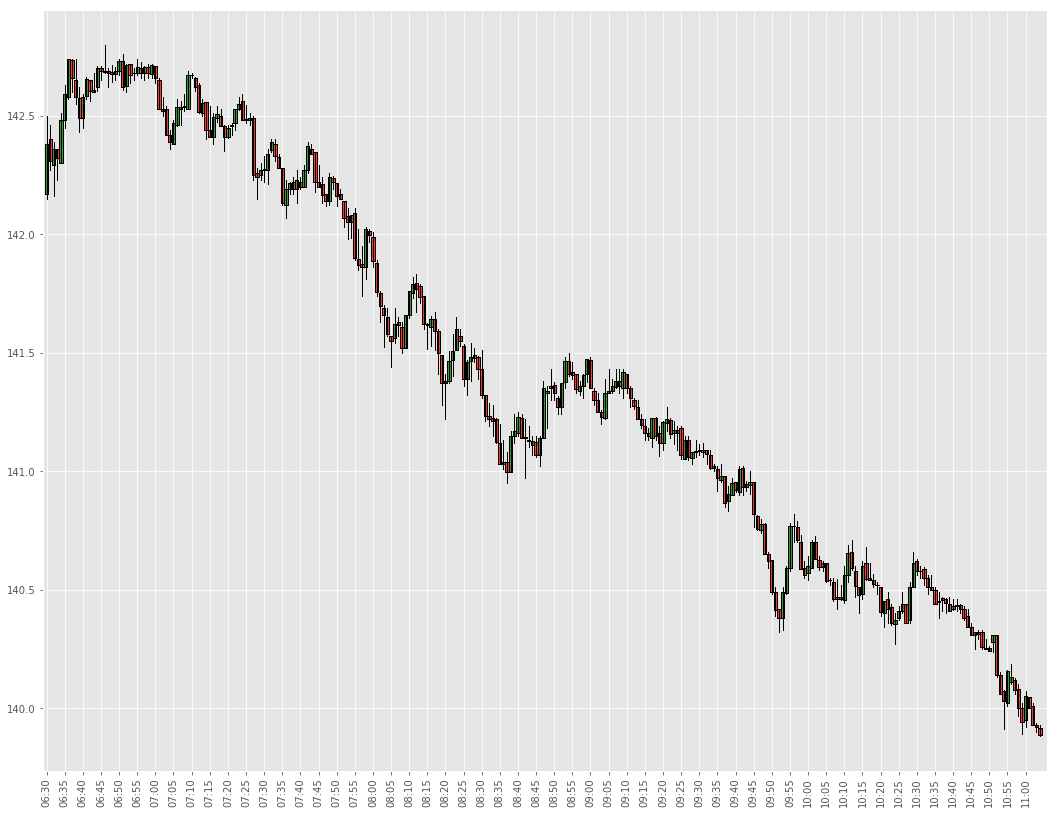

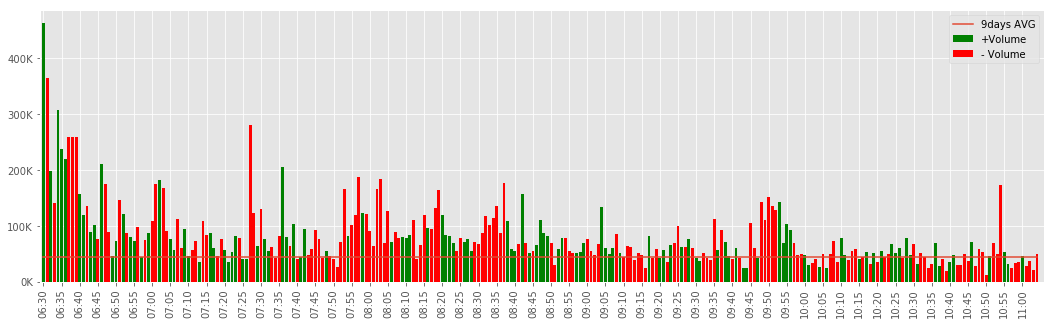

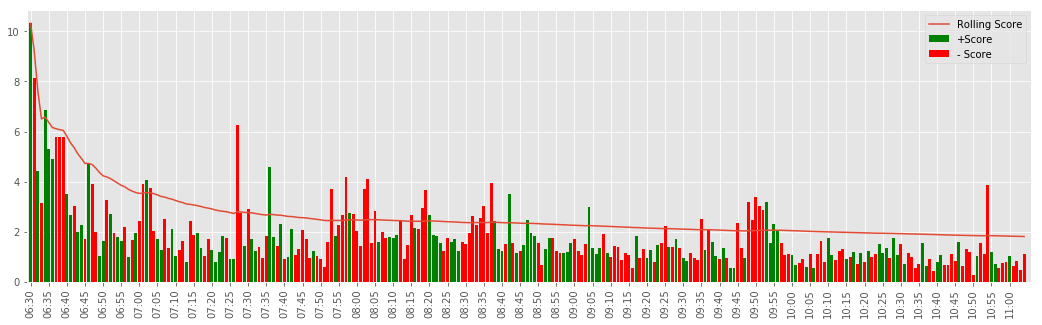

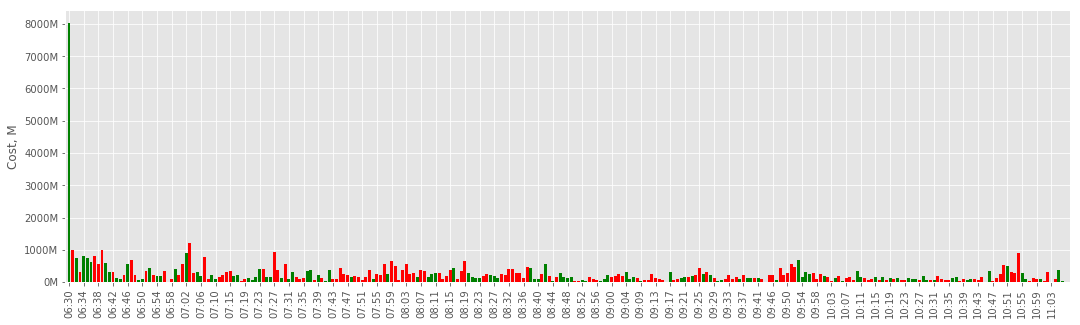

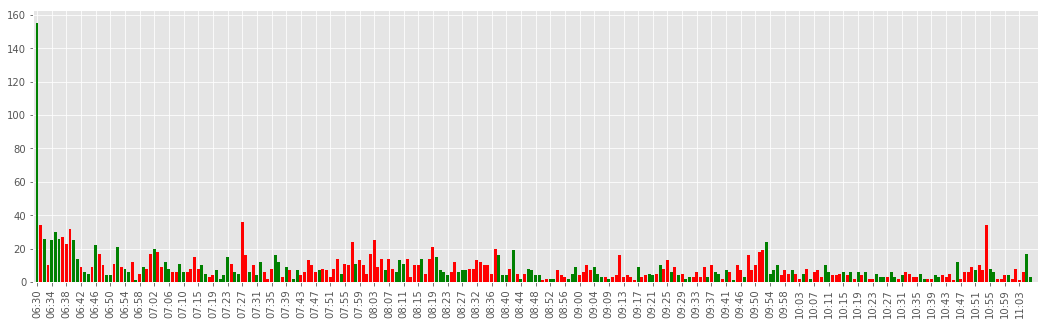

In [10]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker, style
style.use('ggplot')

def display_charts(df, trade_df):
    df = df.reset_index()    
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.iloc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    # trades
    len_trade_df = len(trade_df)
    if len_trade_df:
        trade_df = trade_df.reset_index()
        neg_times = set(negative.time.values)
        positive = trade_df[trade_df.Time.isin(neg_times) == False]    
        negative = trade_df[trade_df.Time.isin(neg_times)]


        fig = plt.figure(figsize=(18, 5)) 
        ax4 = plt.subplot(111)  

        if len(positive):
            ax4.bar(positive.index, positive.Cost, color='green', align='center')
        if len(negative):
            ax4.bar(negative.index, negative.Cost, color='red', align='center')
        
        period = len_trade_df // 90 + 1
        xticks = [n for n in range(0, len_trade_df, period)]
        ax4.set_xticks(xticks)
        ax4.set_xticklabels([trade_df.iloc[i].Time.strftime('%H:%M') for i in ax4.get_xticks()], rotation=90)
        ax4.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dM" % (x / 1000000)))
        ax4.set_ylabel('Cost, M')
        ax4.set_xlim(-1, len_trade_df+1)


        fig = plt.figure(figsize=(18, 5)) 
        ax5 = plt.subplot(111)    
        if len(positive):
            ax5.bar(positive.index, positive.Count, color='green', align='center')
        if len(negative):
            ax5.bar(negative.index, negative.Count, color='red', align='center')
        ax5.set_xticks(xticks)
        ax5.set_xticklabels([trade_df.iloc[i].Time.strftime('%H:%M') for i in ax5.get_xticks()], rotation=90)
        ax5.set_xlim(-1, len_trade_df+1)
    
    
    plt.show()

display_charts(all_dd[all_dd.symbol == stocks[0]], trade_lots_df[trade_lots_df.Symbol == stocks[0]])

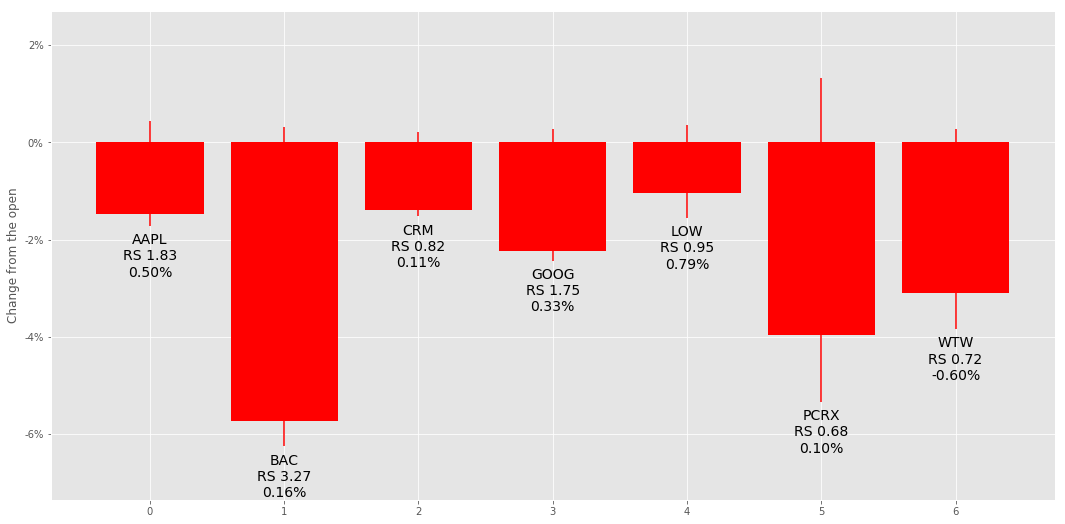

,symbol,close,open,change_current,change_high,change_low,opening_change,rolling_score
0,AAPL,140.080,139.950,-1.470071,0.443131,-1.716255,0.501909,1.831140
1,BAC,23.080,23.050,-5.718954,0.326797,-6.250000,0.163666,3.266672
2,CRM,81.850,81.820,-1.385542,0.216867,-1.518072,0.108551,0.824563
3,GOOG,832.210,831.780,-2.233265,0.267851,-2.431757,0.332390,1.752244
4,LOW,82.130,82.155,-1.048193,0.361446,-1.554217,0.789314,0.948824
5,PCRX,46.775,46.725,-3.952772,1.334702,-5.338809,0.102775,0.683204
6,WTW,14.380,14.360,-3.099730,0.269542,-3.840970,-0.602813,0.723289


In [13]:
def display_summary_chart(dd):
    positive = dd[dd.change_current >= 0]
    negative = dd[dd.change_current < 0]
    
    fig = plt.figure(figsize=(18, 9)) 
    ax = plt.subplot(111)
    ax.bar(positive.index, positive.change_current, color='green', align='center', label="Pos")
    ax.bar(negative.index, negative.change_current, color='red', align='center', label="Neg")    
    lines = plt.vlines(positive.index, positive.change_low, positive.change_high, colors='g')
    paths1 = lines.get_paths()
    lines = plt.vlines(negative.index, negative.change_low, negative.change_high, colors='r')
    paths2 = lines.get_paths()
    
    def autolabel(rects, dd):        
        for n, rect in enumerate(rects):
            item = dd.iloc[n]            
            box = rect.get_extents()
            x = box.x0            
            y = box.y0 - 1.1 if item.change_current < 0 else box.y1
            ax.text(x, y, "{}\nRS {:.2f}\n{:.2f}%".format(item.symbol, item.rolling_score, item.opening_change), 
                    ha='center', va='bottom', fontsize=14)

    autolabel(paths1, positive)
    autolabel(paths2, negative)
    
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 1.1, y_max + 1) 
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "{:.0f}%".format(x)))
    ax.set_ylabel('Change from the open')
    plt.show()

last_minute_dd = all_dd.groupby('symbol').last().reset_index()
display_summary_chart(last_minute_dd)
last_minute_dd[
    ['symbol', 'close', 'open', 'change_current', 'change_high', 'change_low', 'opening_change', 'rolling_score']
]

In [14]:
def get_current_time_period(now):
    lots_times = (
        (6, 59),
        (7, 29),
        (7, 59),
        (8, 29),
        (8, 59),
        (9, 29),
        (9, 59),
        (10,29),
        (10, 59),
        (11, 29),
        (11, 59),
        (12, 29),
        (13, 0),
    )
    for n, i in enumerate(lots_times):
        if i > (now.hour, now.minute):
            break
    
    return n + 1
    

now = datetime.now(tz=LOCAL_TZ)
print(now)
get_current_time_period(now)

2017-03-21 11:10:13.918507-07:00


10

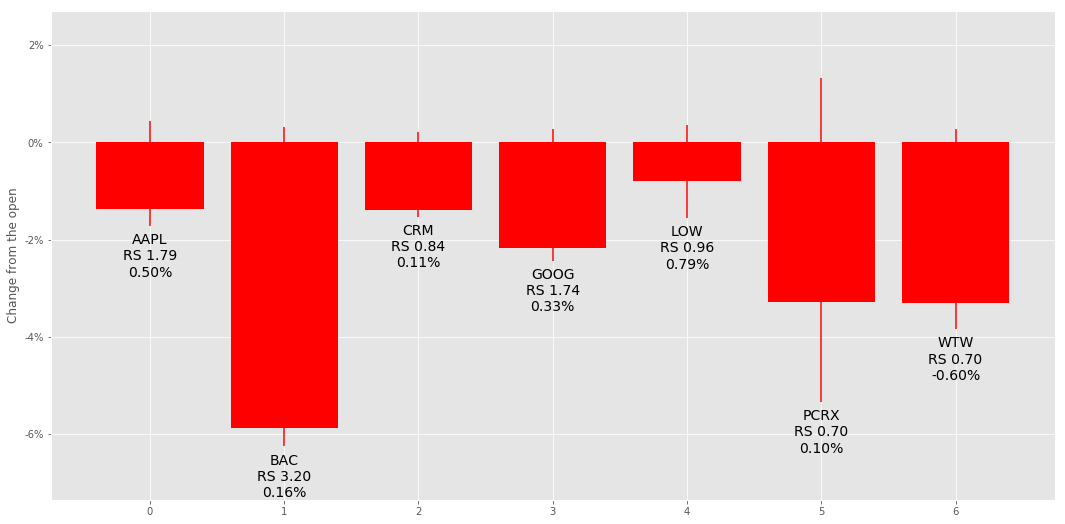

1. BAC 11:30AM: Rolling Score 3.204229162259431, Current Score 0.32068347657220153


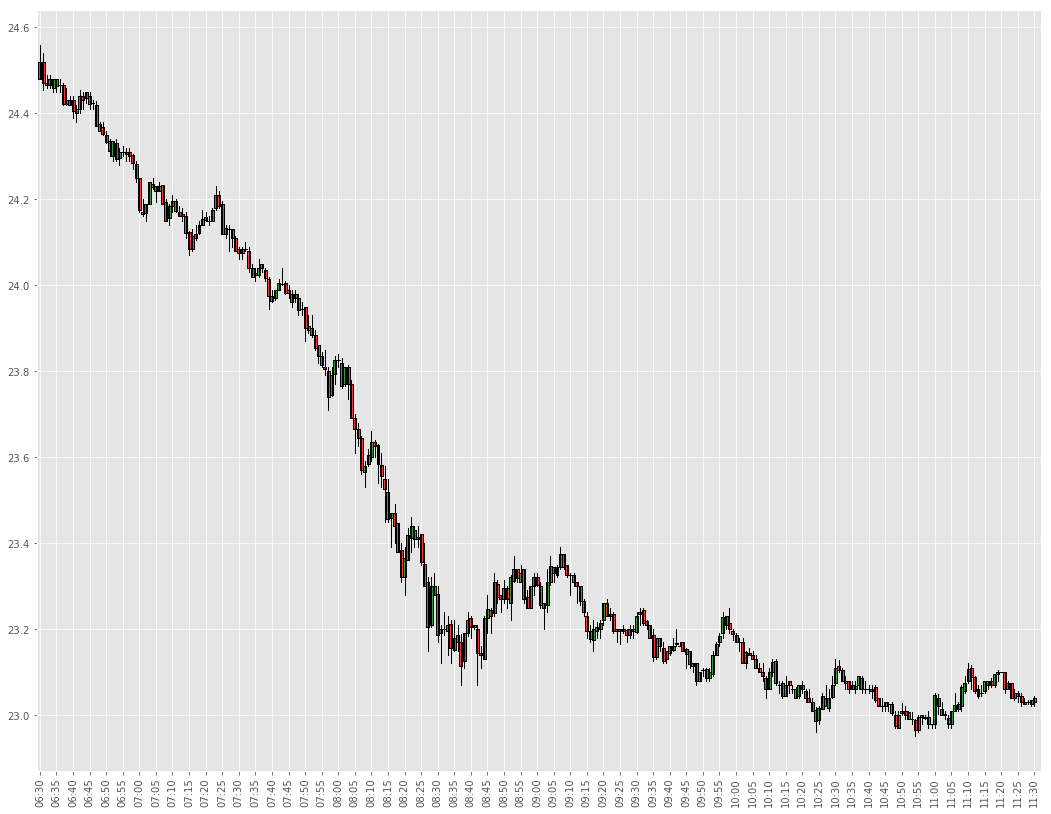

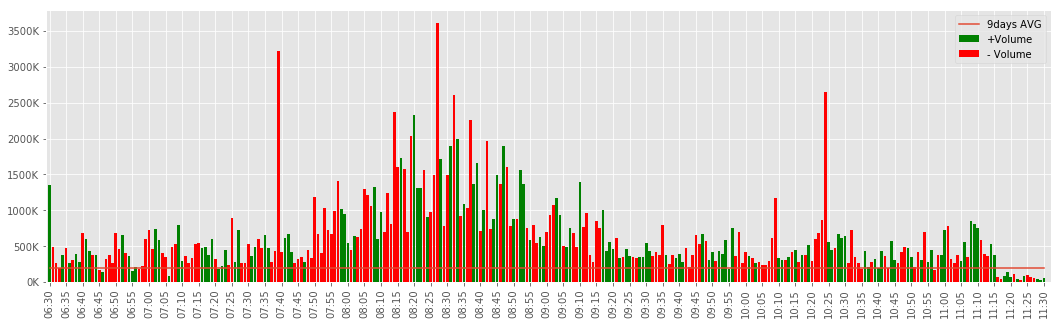

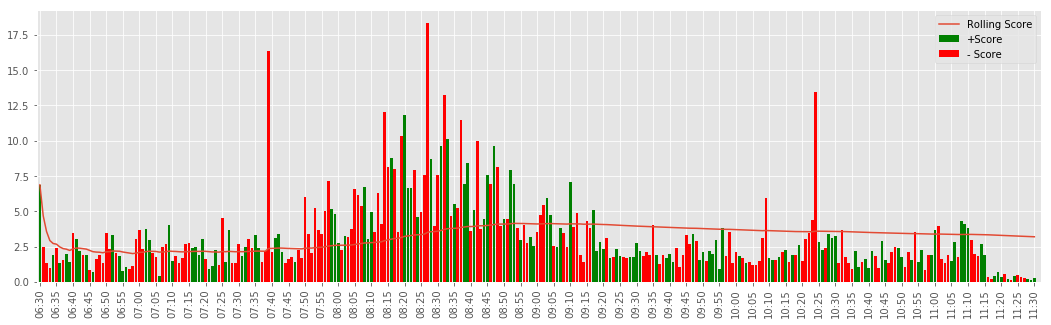

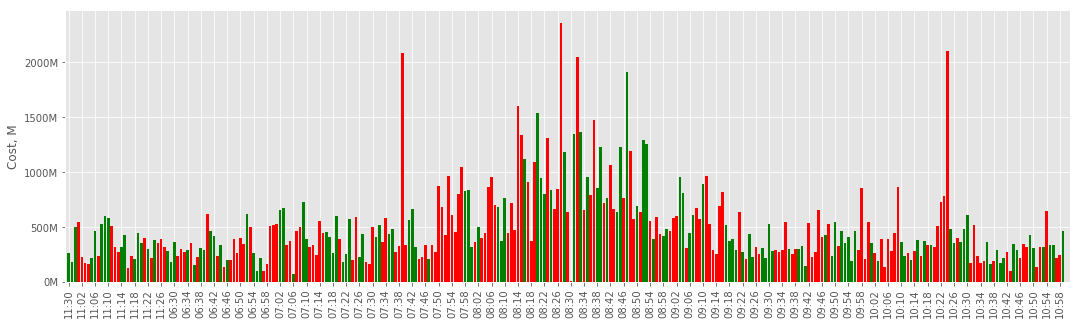

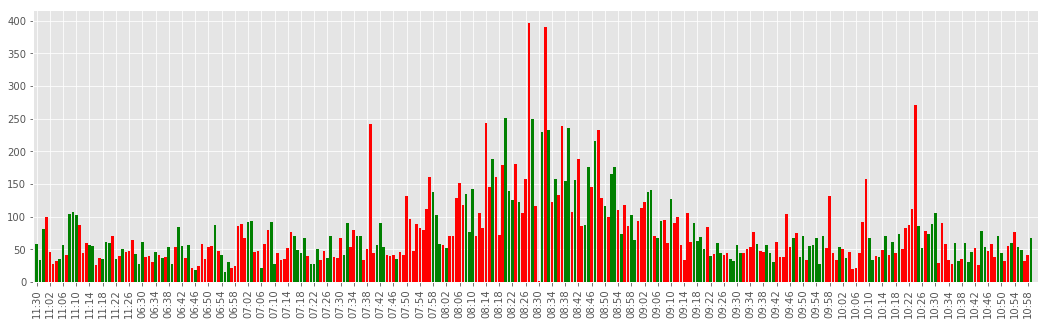

2. AAPL 11:30AM: Rolling Score 1.7943852366645685, Current Score 0.4469206567601698


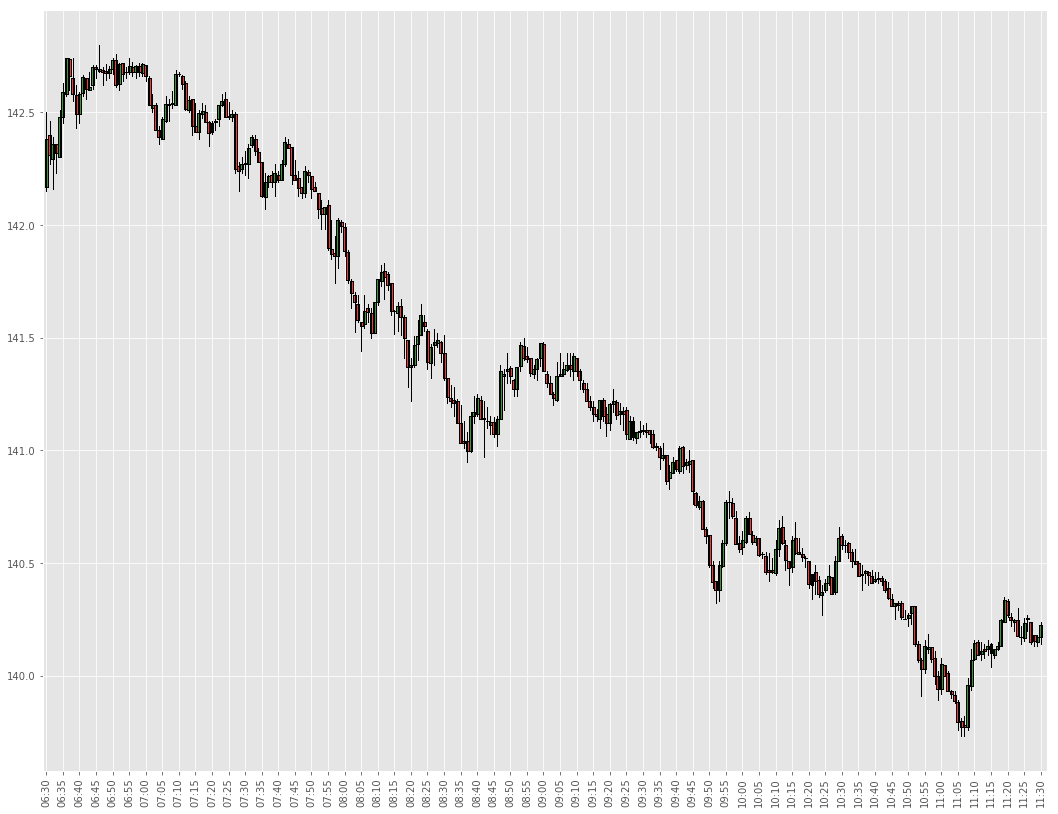

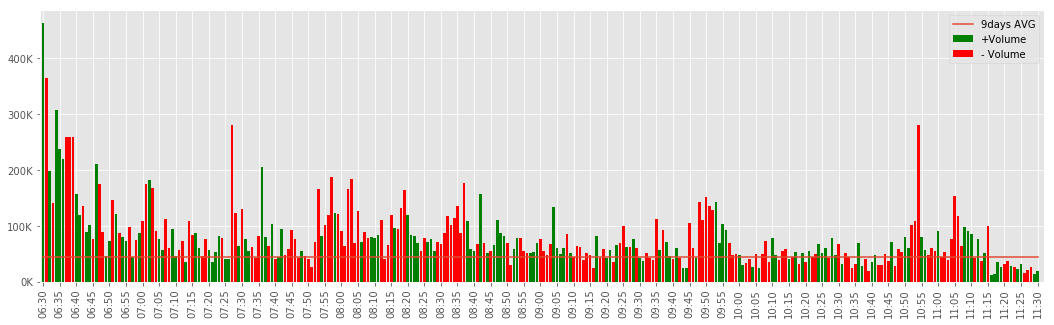

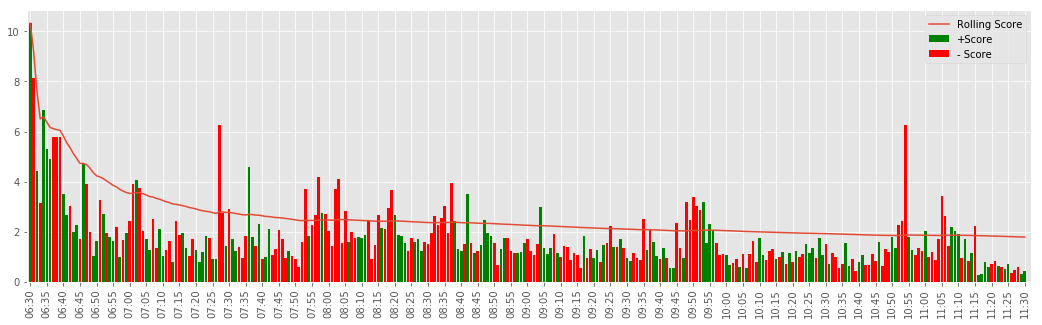

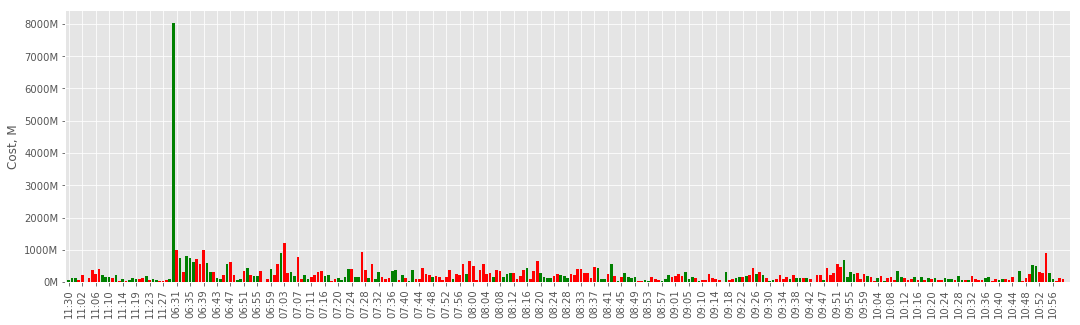

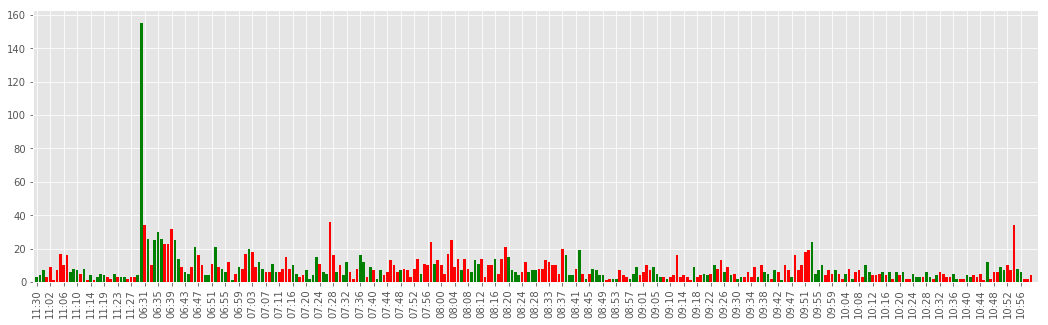

3. GOOG 11:30AM: Rolling Score 1.7401075604411775, Current Score 0.866168126644835


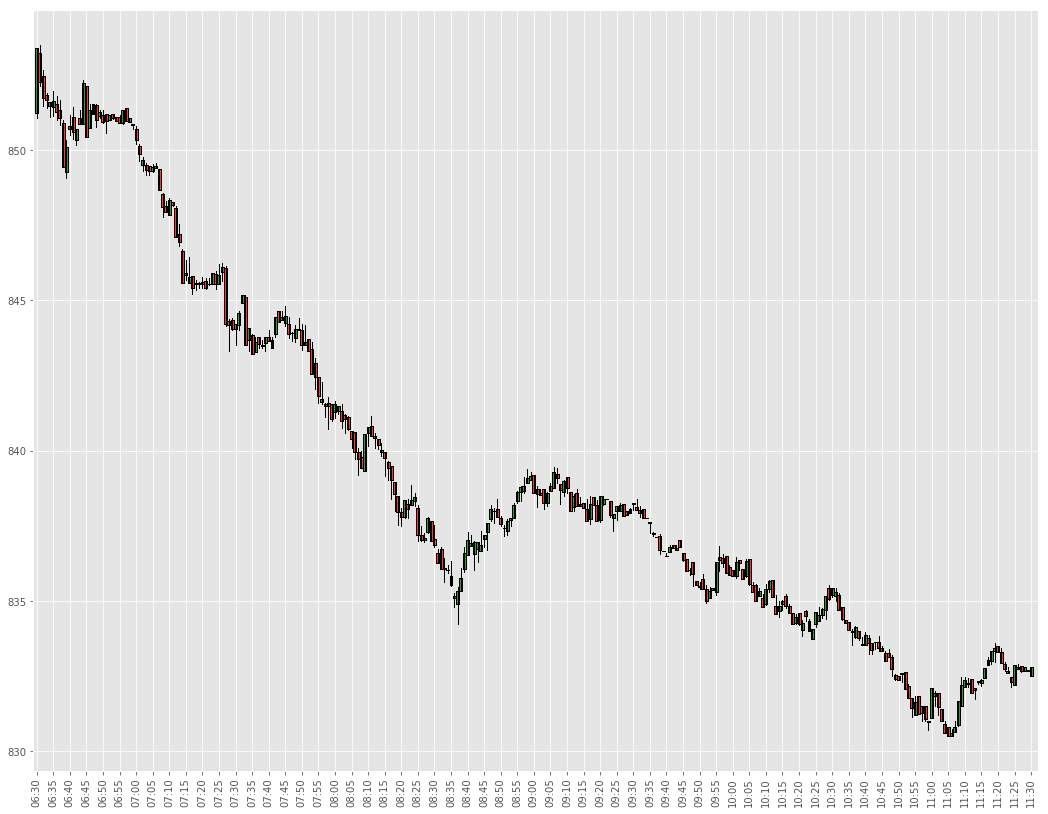

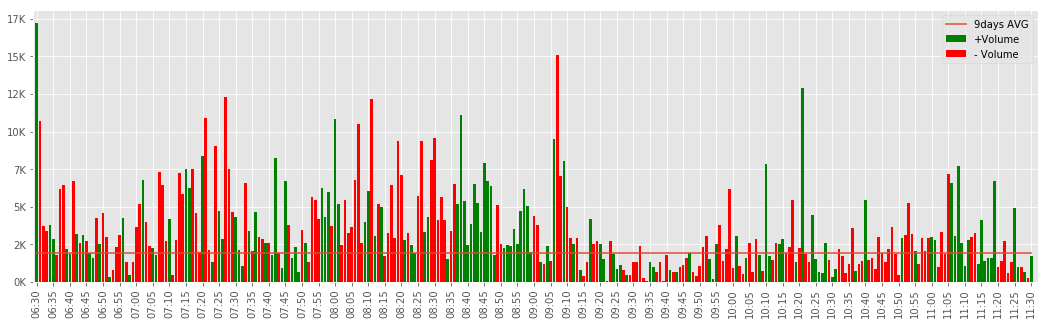

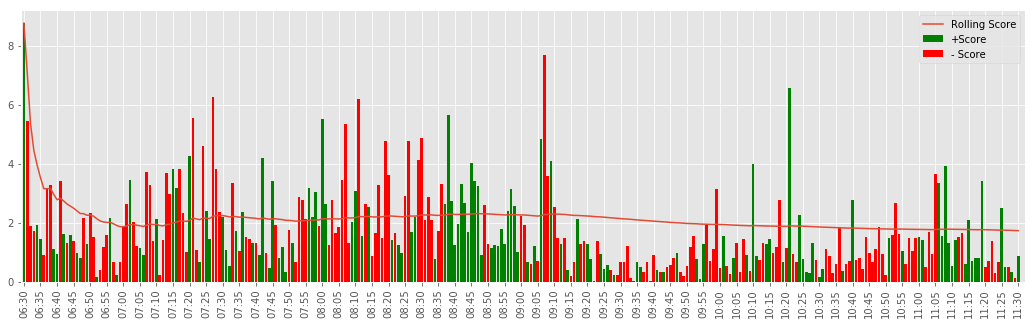

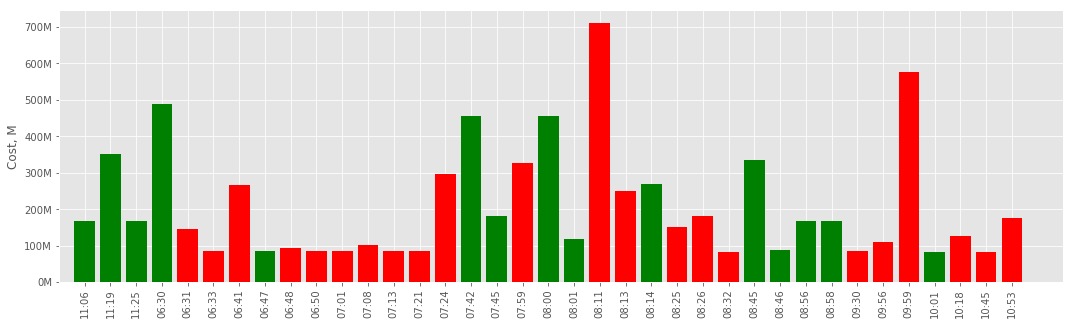

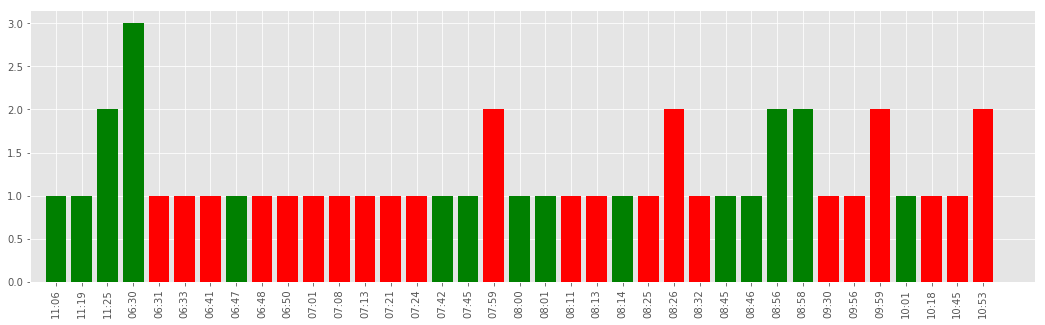

4. LOW 11:30AM: Rolling Score 0.9572279246040195, Current Score 0.4235513262867616


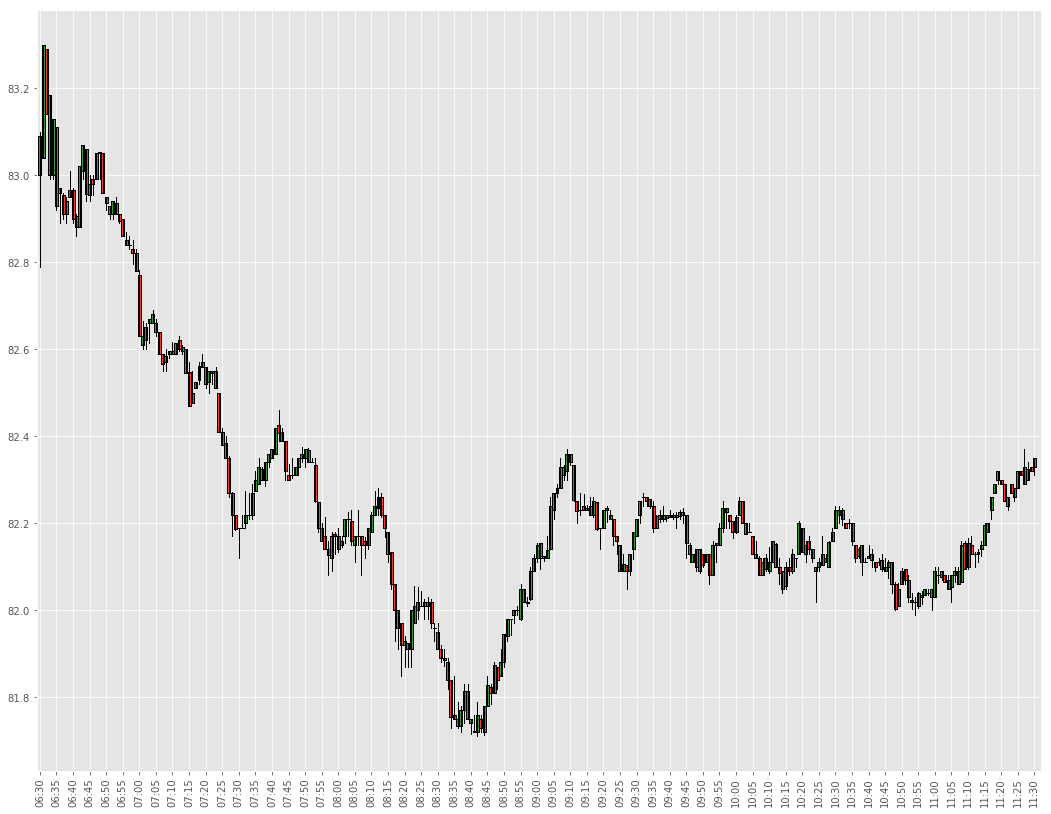

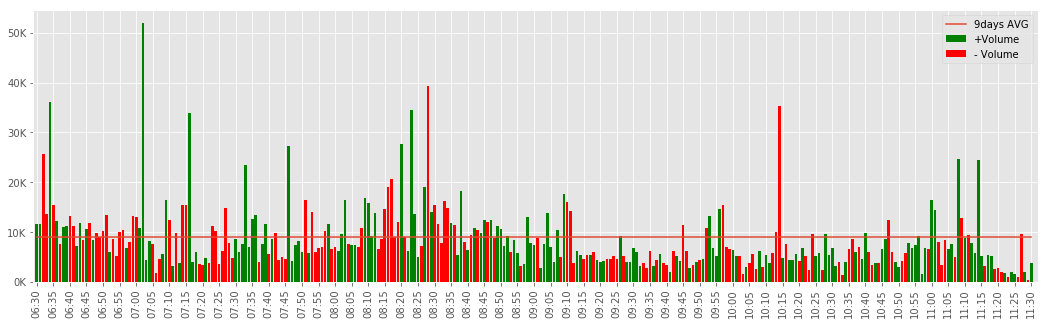

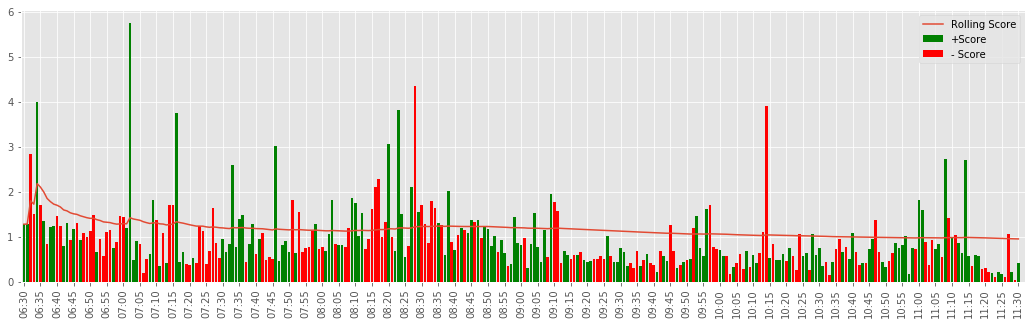

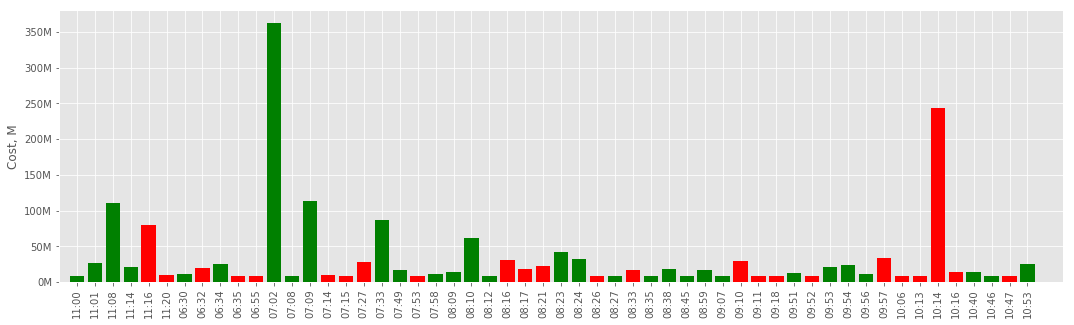

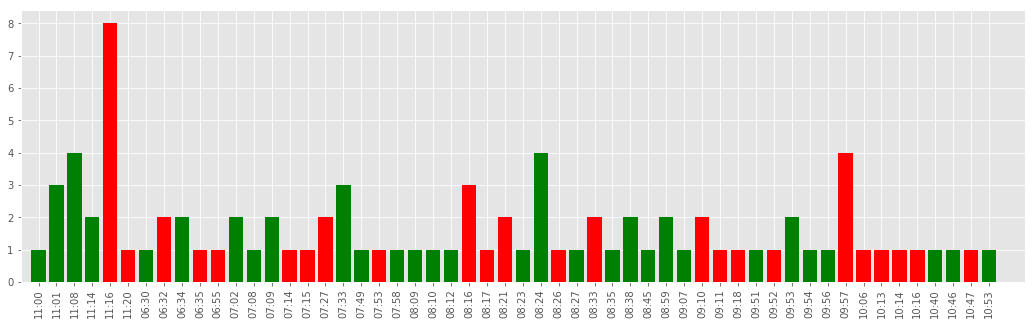

5. CRM 11:30AM: Rolling Score 0.8417304470052359, Current Score 0.14755661442419452


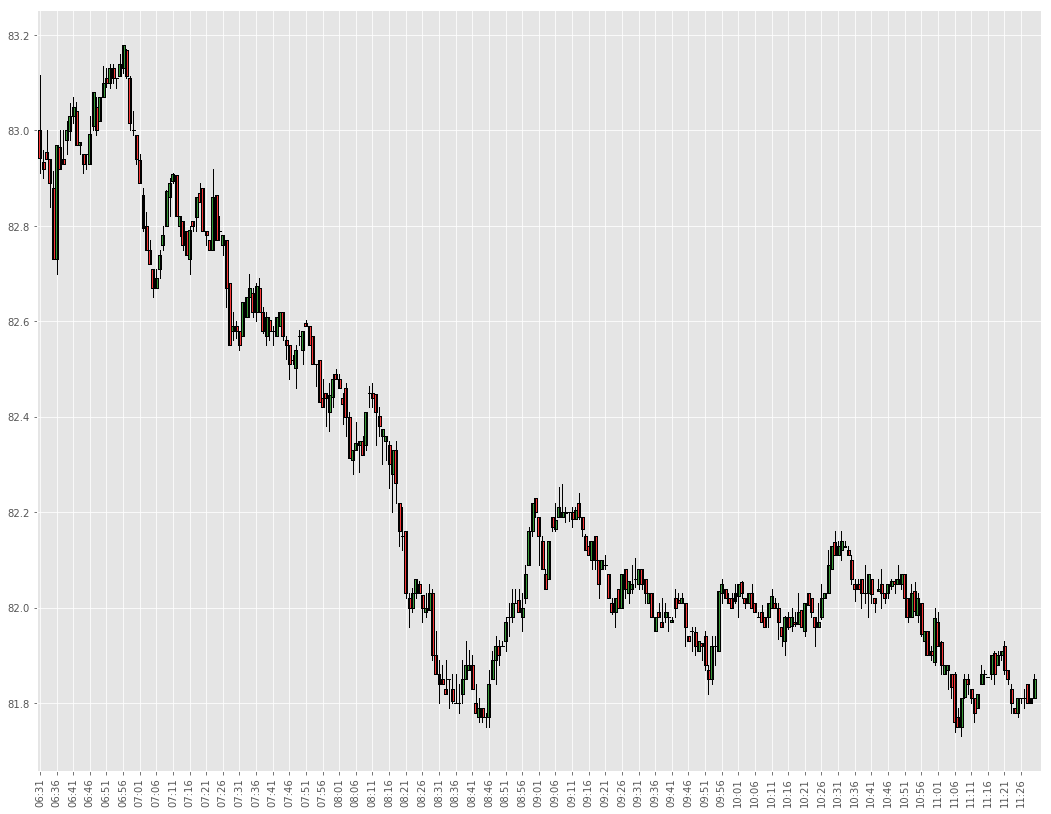

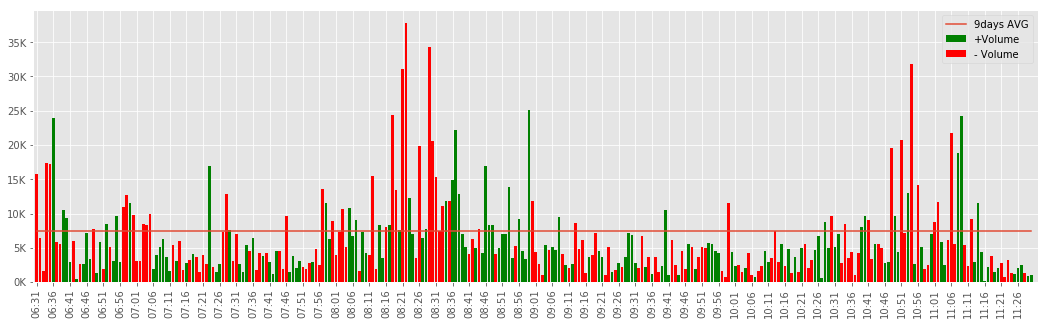

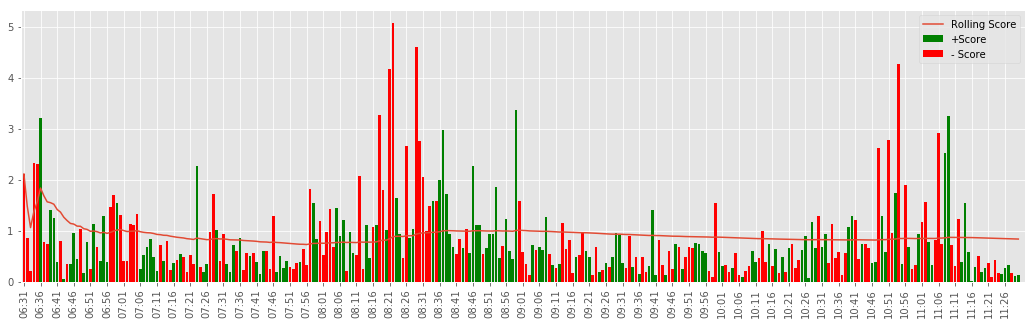

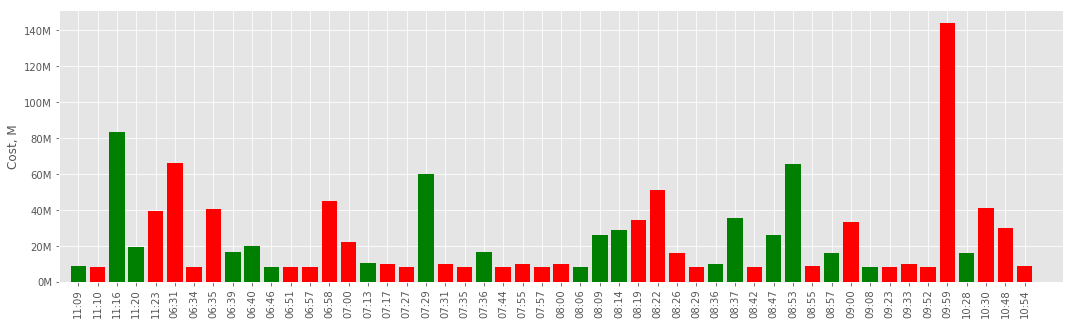

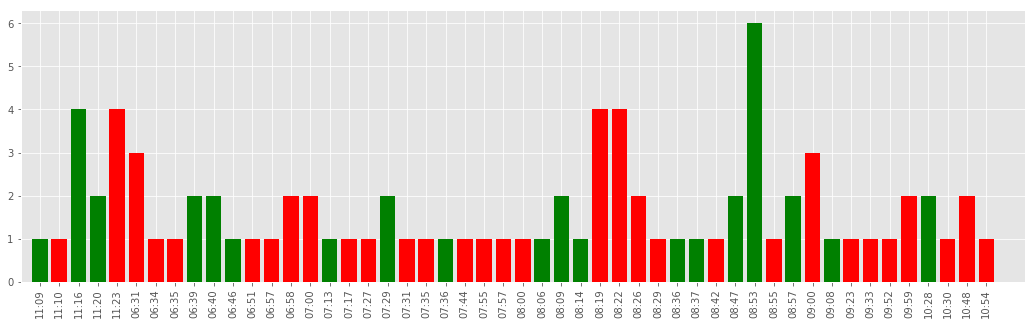

6. PCRX 11:30AM: Rolling Score 0.7039452518048852, Current Score 3.292139241869121


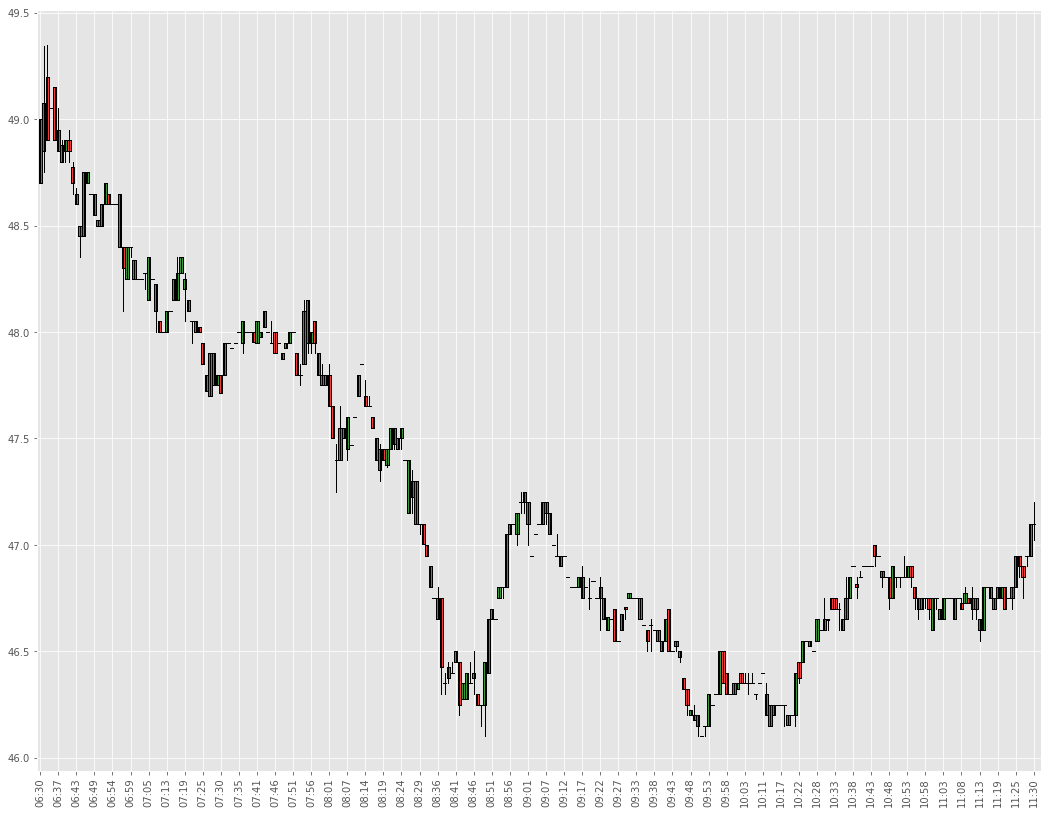

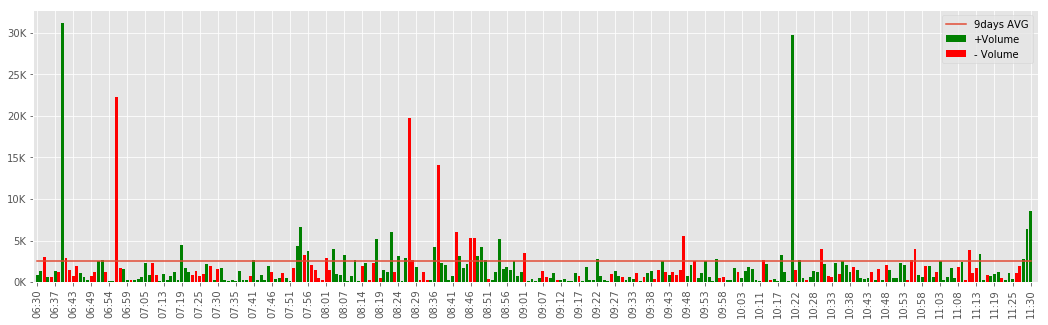

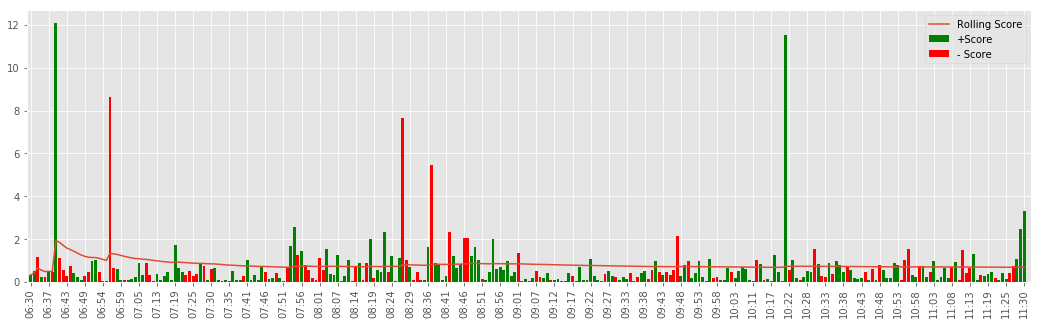

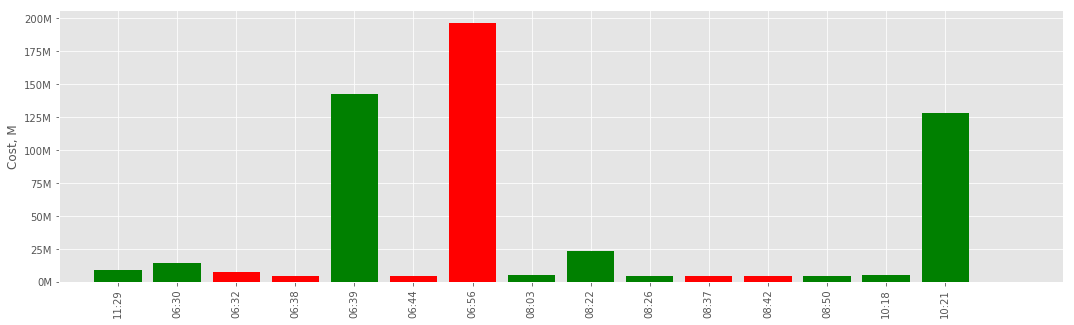

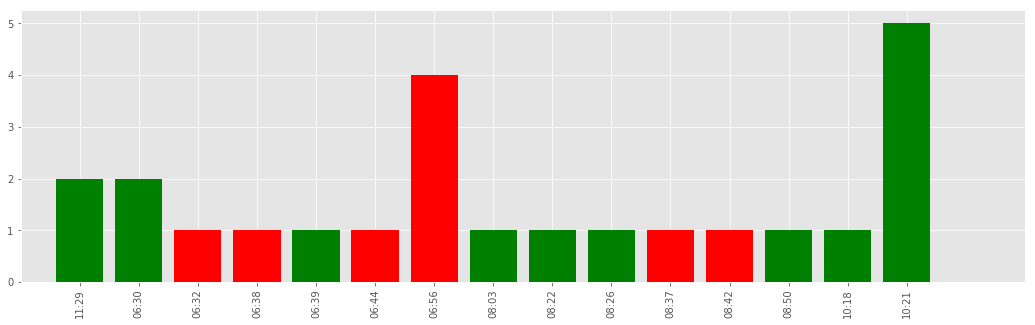

7. WTW 11:29AM: Rolling Score 0.7035381282412041, Current Score 0.0668002460662048


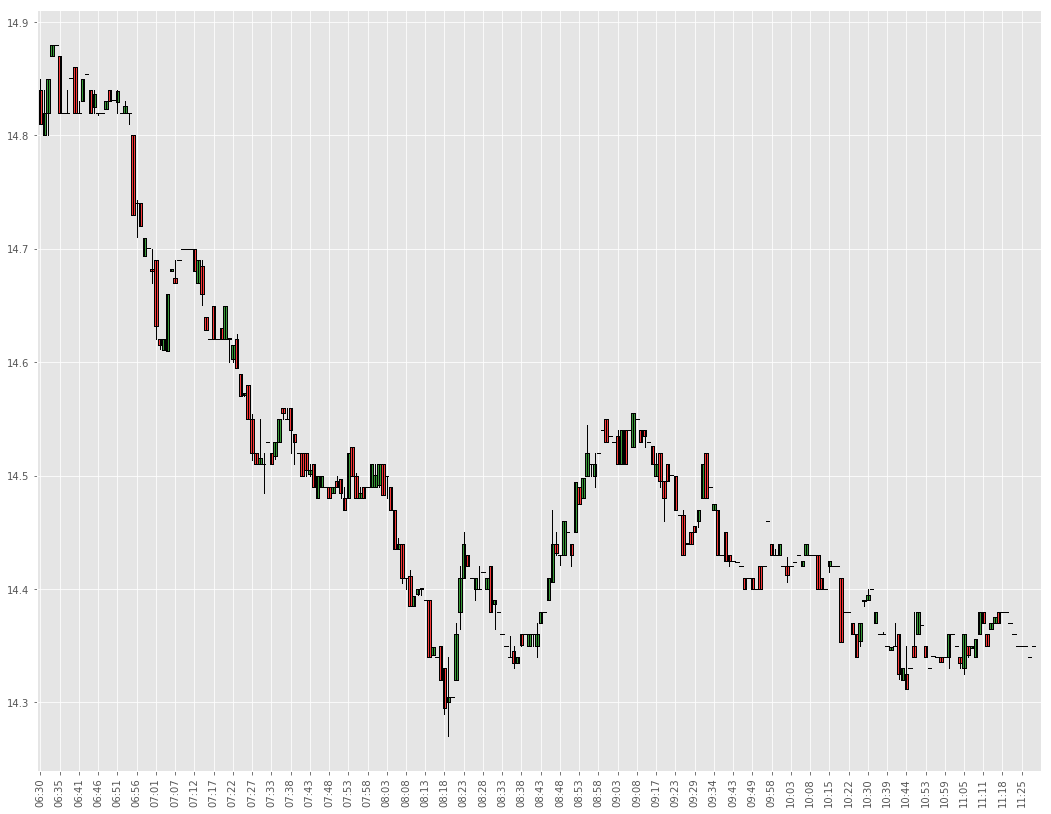

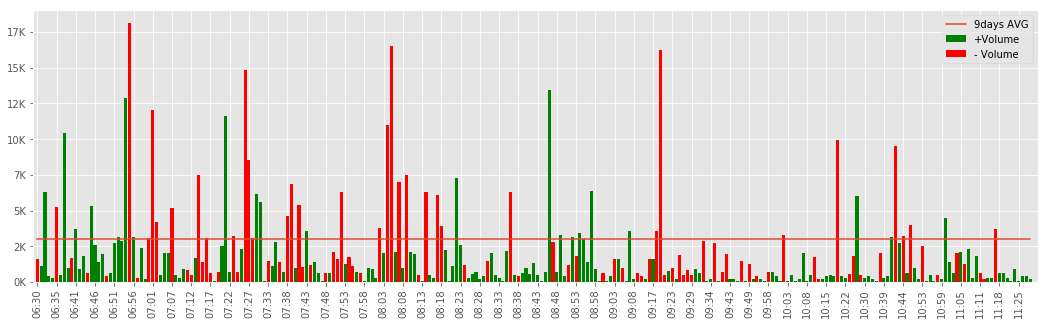

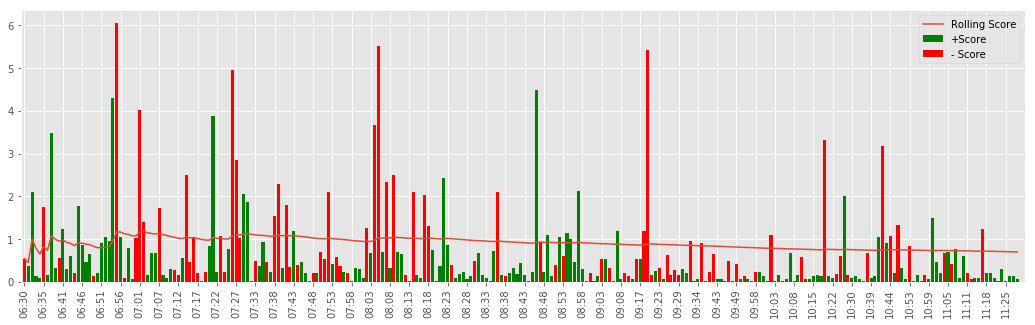

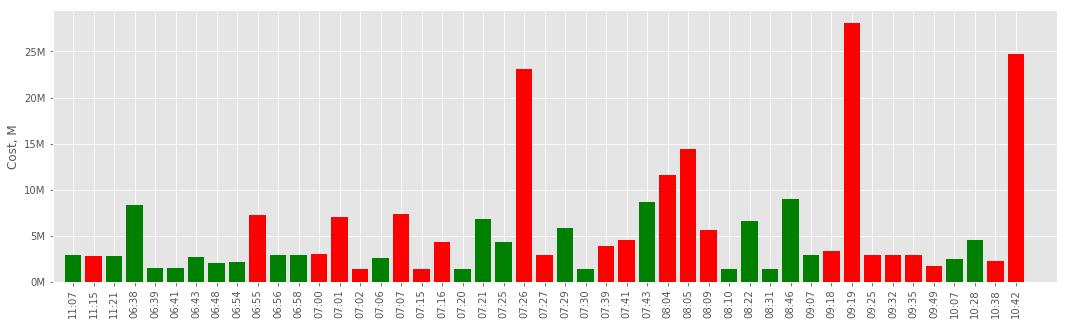

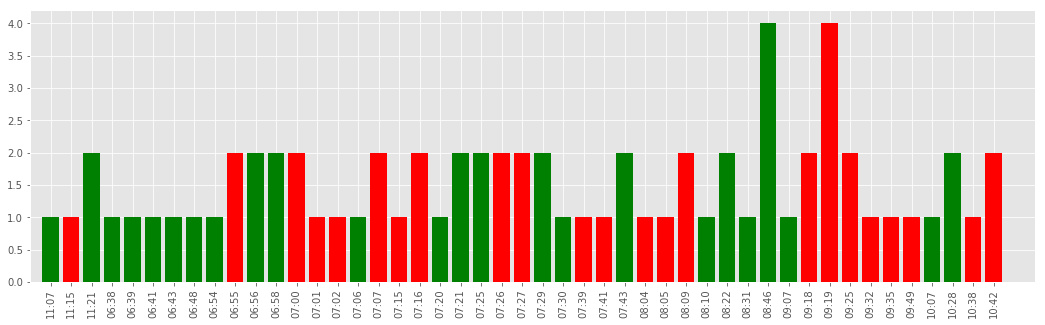

last update 2017-03-21 11:31:10.855663-07:00
prev update 2017-03-21 11:29:44.624197-07:00
update time 0:01:12.013660


KeyboardInterrupt: 

In [17]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = pytz.timezone('America/Los_Angeles')
stocks = get_stocks()

def display_list_items(top_df, all_df, trade_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol], trade_df[trade_df.Symbol == item.symbol])

last_time = None
trade_lots = None
trade_cache_times = {}


while True:    
    now = datetime.now(tz=LOCAL_TZ)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
                
        # MINUTE DATA            
        df = get_data_parallel(stocks)        
        if df is not None:
            last_minute_data = df.groupby('symbol').last().reset_index()
            top_volumes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]            
            top_symbols = top_volumes.symbol.values
            
            # TRADE DATA
            # check saved periods
            
            current_time_period = get_current_time_period(now)
            symbol_saved_periods = {}
            for symbol in top_symbols:
                saved_time = int(trade_cache_times.get(symbol, 0))
                symbol_saved_periods[symbol] = tuple(range(saved_time + 1, current_time_period + 1))
                trade_cache_times[symbol] = current_time_period - 1
                
            response = load_trades_data(symbol_saved_periods, now)
            res_len = len(response)
            if res_len:            
                if trade_lots is not None:
                    trade_lots = response.append(trade_lots, ignore_index=True)
                else:
                    trade_lots = response
                    
            # DRAW CHARTS
            clear_output()
            display(HTML("<h3>Rolling Score List</h3>"))
            display_summary_chart(top_volumes)
            display_list_items(top_volumes, df, trade_lots)   
            
            # drop current period data 
            trade_lots = trade_lots[trade_lots.TimePeriod != current_time_period]
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=LOCAL_TZ) - now)
        last_time = now        
    else:   
        trade_lots = None
        trade_cache_times = {}
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)